In [88]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
pd.plotting.register_matplotlib_converters()
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from tqdm import tqdm

## Loading samples

In [13]:
data = pd.read_csv("CUP_IT_train_data.csv")

In [ ]:
# data.head(n=12)
print("cu_education_level -", len(data['cu_education_level'].unique()))
print("cu_empl_area -", len(data['cu_empl_area'].unique()))
print("cu_empl_level -", len(data['cu_empl_level'].unique()))
print("cu_eduaction_level -", len(data['cu_eduaction_level'].unique()))
print("big_city -", len(data['big_city'].unique()))

In [49]:
data['dlk_cob_date'] = pd.to_datetime(data['dlk_cob_date'])

In [50]:
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

# Make copy to avoid changing original data 
label_X_train = data.copy()

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    data[col] = data[col].apply(str)
    label_X_train[col] = label_encoder.fit_transform(data[col])

In [51]:
object_cols

['big_city', 'cu_education_level', 'cu_empl_area', 'cu_empl_level']

In [52]:
label_X_train

,cif_id,dlk_cob_date,gi_smooth_3m,big_city,cu_gender,cu_education_level,cu_empl_area,cu_empl_level,payroll_f,cur_quantity_pl,...,active,standalone_dc_f,standalone_payroll_dc_f,standalone_nonpayroll_dc_f,salary,cu_age,cu_mob,cu_empl_cur_dur_m,is_married,cu_eduaction_level
0,335992,2018-06-30,17.957530,0,0,1,63,18,0,1,...,1,0,0,0,1192.8,29.0,144,46.0,1,2
1,335992,2018-04-30,27.720918,0,0,1,63,18,0,1,...,1,0,0,0,1192.8,29.0,142,44.0,1,2
2,335992,2018-05-31,21.949626,0,0,1,63,18,0,1,...,1,0,0,0,1192.8,29.0,143,45.0,1,2
3,335992,2018-08-31,14.855459,0,0,1,63,18,0,1,...,1,0,0,0,1192.8,29.0,146,48.0,1,2
4,335992,2018-03-31,27.917161,0,0,1,63,18,0,1,...,1,0,0,0,1192.8,29.0,141,43.0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4161778,120605,2018-06-30,52.379263,1,0,1,63,18,0,1,...,1,1,0,1,960.0,34.0,115,31.0,1,2
4161779,120605,2018-02-28,54.218822,1,0,1,63,18,0,1,...,1,1,0,1,960.0,33.0,111,27.0,1,2
4161780,120605,2018-03-31,53.343644,1,0,1,63,18,0,1,...,1,1,0,1,960.0,33.0,112,28.0,1,2
4161781,120605,2018-04-30,52.248182,1,0,1,63,18,0,1,...,1,1,0,1,960.0,34.0,113,29.0,1,2


In [53]:
# Imputation
my_imputer = SimpleImputer()
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(label_X_train.drop(columns=['dlk_cob_date'])))

# Imputation removed column names; put them back
imputed_X_train.insert(1, 'dlk_cob_date', label_X_train['dlk_cob_date'])
imputed_X_train.columns = label_X_train.columns

In [54]:
imputed_X_train.iloc[:140,10:20]

,cur_quantity_mort,cur_quantity_cc,cur_quantity_deposits,cur_quantity_dc,cur_quantity_accounts,cur_quantity_saccounts,cur_quantity_mf,cc_balance,cl_balance,ml_balance
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-1042.465432,-2996.8384,-37766.93951
1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-1042.465432,-2996.8384,-37766.93951
2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-1042.465432,-2996.8384,-37766.93951
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-1042.465432,-2996.8384,-37766.93951
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-1042.465432,-2996.8384,-37766.93951
...,...,...,...,...,...,...,...,...,...,...
135,0.0,2.0,0.0,0.0,1.0,0.0,0.0,-1275.138480,-2996.8384,-37766.93951
136,0.0,2.0,0.0,0.0,1.0,0.0,0.0,-1287.708240,-2996.8384,-37766.93951
137,0.0,2.0,0.0,0.0,1.0,0.0,0.0,-1151.651040,-2996.8384,-37766.93951
138,0.0,2.0,0.0,0.0,1.0,0.0,0.0,-1236.267120,-2996.8384,-37766.93951


In [62]:
users_id = data['cif_id'].unique()[:3000]
size = 44
X_users = np.ndarray(shape=(0, size))
y_users = np.empty(0)
for j in tqdm(np.arange(len(users_id))):
    user = users_id[j]
    current_user_data = imputed_X_train[imputed_X_train.cif_id == user].sort_values(by='dlk_cob_date').drop(columns=['dlk_cob_date', 'gi_smooth_3m']).to_numpy()
    gi_smooth_3m = imputed_X_train[imputed_X_train.cif_id == user].sort_values(by='dlk_cob_date')['gi_smooth_3m'].to_numpy()
    for i in np.arange(len(current_user_data) - 6):
        X_users = np.append(X_users, current_user_data[i].reshape((1, size)), axis=0)
        y_users = np.append(y_users, np.asarray([sum(gi_smooth_3m[i + 1:i + 8])]), axis=0)

100%|██████████| 3000/3000 [02:03<00:00, 24.38it/s]


In [63]:
X_users.shape

(14699, 44)

### Saving

In [114]:
np.savez_compressed('data_np', sample=X_users, label=y_users)

### Loading

In [2]:
tmp = np.load('data_np.npz')
X_users = tmp['sample']
y_users = tmp['label']
X_users.shape

(14699, 44)

# Not updated yet!!!

## Split into validation and train data

In [5]:
X_val = X_users[-2500:]
X_train = X_users[0:-2500]
Y_val = y_users[-2500:]
Y_train = y_users[0:-2500]
X_train.shape

(12199, 44)

## Preparing dataset

In [116]:
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, Y_val)).repeat().shuffle(len(X_val)).batch(256)
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).repeat().shuffle(len(X_train)).batch(512)

## Preparing model

#### NeuralNet

In [122]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(44, input_shape=(44,), activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])

In [123]:
sgd = tf.keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

In [124]:
# model.compile(loss='sparse_categorical_crossentropy',
#               optimizer=sgd,
#               metrics=['accuracy'])
model.compile(optimizer=sgd,
              loss='MSE',
              metrics=['accuracy'])

## Train model

In [47]:
model.fit(train_dataset, epochs=1, validation_data=val_dataset, steps_per_epoch=X_train.shape[0]//256, validation_steps=2500//128)

NameError: name 'model' is not defined

### RandomForest

In [131]:
tf.estimator.BoostedTreesClassifier(
    X_train, X_train.shape[0]//512, model_dir=None,
    n_classes=200, weight_column=None,
    label_vocabulary=None, n_trees=100, max_depth=6, learning_rate=0.1,
    l1_regularization=0.0, l2_regularization=0.0, tree_complexity=0.0,
    min_node_weight=0.0, config=None, center_bias=False, pruning_mode= None,
    quantile_sketch_epsilon=0.01, train_in_memory=False
)

ValueError: For now only binary classification is supported.n_classes given as 200

#### XGBoost

In [64]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

X = pd.DataFrame(X_users, columns=data.drop(columns=['dlk_cob_date', 'gi_smooth_3m']).columns)
y = pd.DataFrame(y_users, columns=['gi_smooth_3m'])


In [65]:
print(X.shape)
print(y.shape)

(14699, 44)
(14699, 1)


In [118]:
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                                random_state=0)
# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
low_cardinality_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and 
                        X_train_full[cname].dtype == "object"]

# Select numeric columns
numeric_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]


# Keep selected columns only
my_cols = low_cardinality_cols + numeric_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()
X_test = X_valid_full[my_cols].copy()


# One-hot encode the data (to shorten the code, we use pandas)
X_train = pd.get_dummies(X_train)
X_valid = pd.get_dummies(X_valid)
X_test = pd.get_dummies(X_test)
X_train, X_valid = X_train.align(X_valid, join='left', axis=1)
X_train, X_test = X_train.align(X_test, join='left', axis=1)


my_model = XGBRegressor(n_estimators=200)
my_model.fit(X_train, y_train, 
             early_stopping_rounds=7, 
             eval_set=[(X_valid, y_valid)],
             verbose=False)

from sklearn.metrics import mean_absolute_error
# Get predictions
predictions_1 = my_model.predict(X_valid) # Your code here

[18:56:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [119]:
print(predictions_1, "\n", y_valid)
# Calculate MAE
mae_1 = mean_absolute_error(predictions_1, prev) # Your code here
prev = predictions_1
# Uncomment to print MAE
print("Mean Absolute Error:" , mae_1)

[ 48.027832  70.65669   76.37608  ... 614.69135  638.06476   40.375557] 
        gi_smooth_3m
1992       0.000000
13093     58.189505
9203     150.110502
8134     753.746374
12802     69.017708
...             ...
3851     875.567333
8055      14.878012
9177     482.668306
7798     363.805374
13545     81.729225

[2940 rows x 1 columns]
Mean Absolute Error: 9.638803


(100, 2)


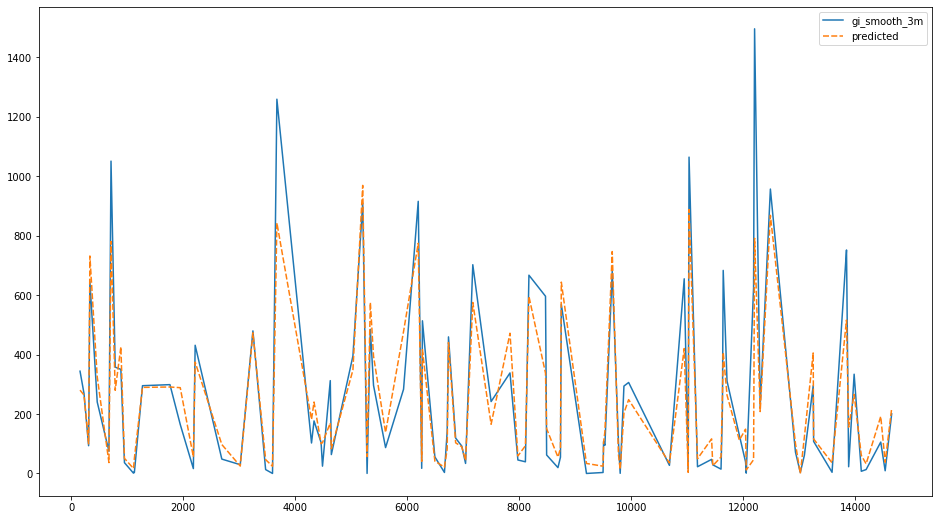

In [98]:
# Set the width and height of the figure
plt.figure(figsize=(16,9))
tmp = y_valid.copy()
tmp['predicted'] = predictions_1
tmp = tmp.iloc[500:600, :]
print(tmp.shape)
# Line chart showing how FIFA rankings evolved over time 
sns.lineplot(data=tmp)

(100, 2)


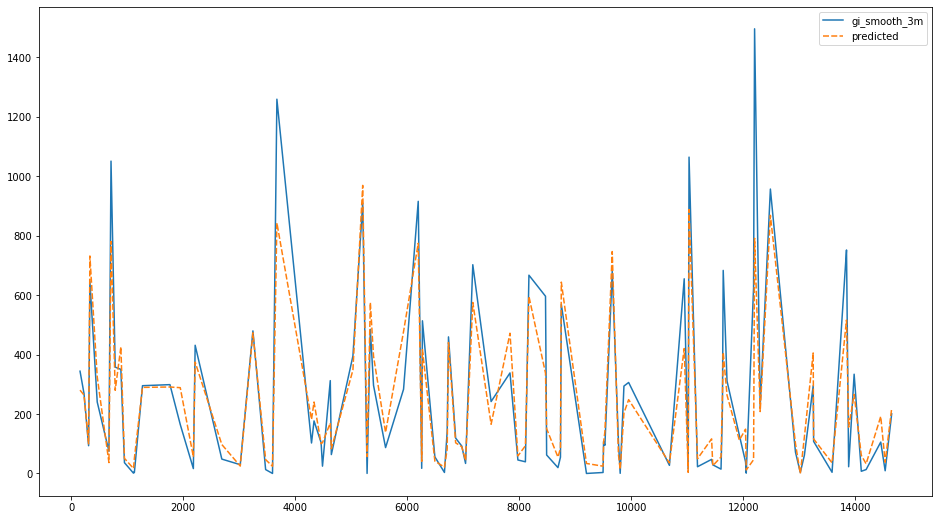

In [114]:
# Set the width and height of the figure
plt.figure(figsize=(16,9))
tmp = y_valid.copy()
tmp['predicted'] = predictions_1
tmp = tmp.iloc[500:600, :]
print(tmp.shape)
# Line chart showing how FIFA rankings evolved over time 
sns.lineplot(data=tmp)